In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

%matplotlib inline

# Downloading csv

In [2]:
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')

Skipping, found downloaded files in ".\us-elections-dataset" (use force=True to force download)


# Reading and showing general info about president_df

In [3]:
president_df = pd.read_csv('./us-elections-dataset/1976-2020-president.csv')

In [4]:
president_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [5]:
president_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


# Cleaning president_df

In [6]:
president_df.drop(columns=['notes','state_fips','state_cen','state_ic','office','party_detailed'], inplace=True)
president_df.candidate.fillna('Unknown', inplace=True)
president_df.loc[president_df.writein.isnull(),'writein'] = False

In [7]:
president_df.describe()

,year,candidatevotes,totalvotes,version
count,4287.000000,4.287000e+03,4.287000e+03,4287.0
mean,1999.080942,3.119076e+05,2.366924e+06,20210113.0
std,14.220014,7.648011e+05,2.465008e+06,0.0
min,1976.000000,0.000000e+00,1.235740e+05,20210113.0
25%,1988.000000,1.177000e+03,6.522740e+05,20210113.0
50%,2000.000000,7.499000e+03,1.569180e+06,20210113.0
75%,2012.000000,1.992415e+05,3.033118e+06,20210113.0
max,2020.000000,1.111025e+07,1.750088e+07,20210113.0


# Creating and working with States_df

In [8]:
states_df = president_df.state.value_counts()

In [9]:
states_df = states_df.reset_index()
states_df.columns = ['state','#_of_candidates']

In [10]:
states_df.shape

(51, 2)

In [11]:
states_df.head()

,state,#_of_candidates
0,COLORADO,149
1,NEW YORK,145
2,MINNESOTA,128
3,IOWA,124
4,VERMONT,122


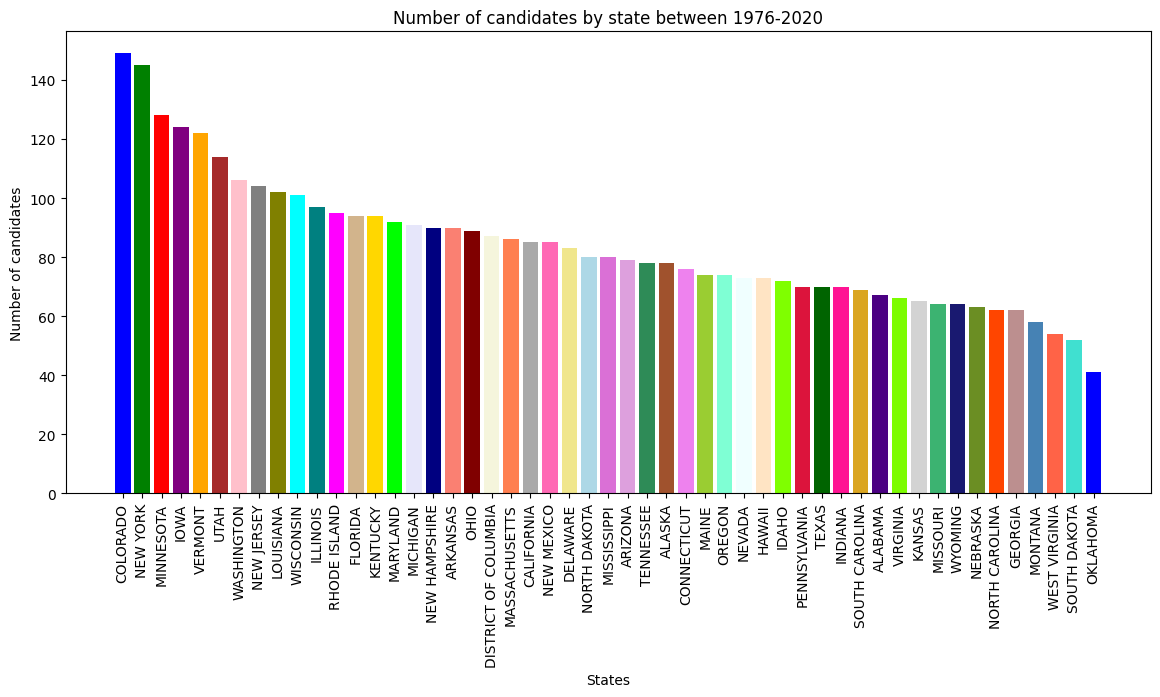

In [12]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'teal', 'magenta', 'tan', 'gold', 'lime', 'lavender', 'navy', 'salmon', 'maroon', 'beige', 'coral', 'darkgray', 'hotpink', 'khaki', 'lightblue', 'orchid', 'plum', 'seagreen', 'sienna', 'violet', 'yellowgreen', 'aquamarine', 'azure', 'bisque', 'chartreuse', 'crimson', 'darkgreen', 'deeppink', 'goldenrod', 'indigo', 'lawngreen', 'lightgray', 'mediumseagreen', 'midnightblue', 'olivedrab', 'orangered', 'rosybrown', 'steelblue', 'tomato', 'turquoise']

plt.figure(figsize=(14,6))
plt.bar(states_df.index, states_df['#_of_candidates'],tick_label=states_df['state'], color=colors, align='center')
plt.xticks(rotation=90)
plt.title('Number of candidates by state between 1976-2020')
plt.xlabel('States')
plt.ylabel('Number of candidates');

#### It seems like between 1976 and 2020 most generous states were Colorado and New York as they voted for many candidates 

A write-in candidate is a candidate whose name does not appear on the ballot, but instead must be written in by the voter. In other words, voters can write in the name of a person they wish to vote for, even if that person has not officially declared their candidacy.

# Election votes by states (Average)

In [13]:
vote_by_state = president_df[['year','state','totalvotes']]
vote_by_state = vote_by_state.drop_duplicates()


states = list(vote_by_state.state.unique())
years = list(vote_by_state.year.unique())


vote_by_state = vote_by_state.pivot(index='year',columns='state',values='totalvotes')
vote_by_state_mean = vote_by_state.mean(axis=0)




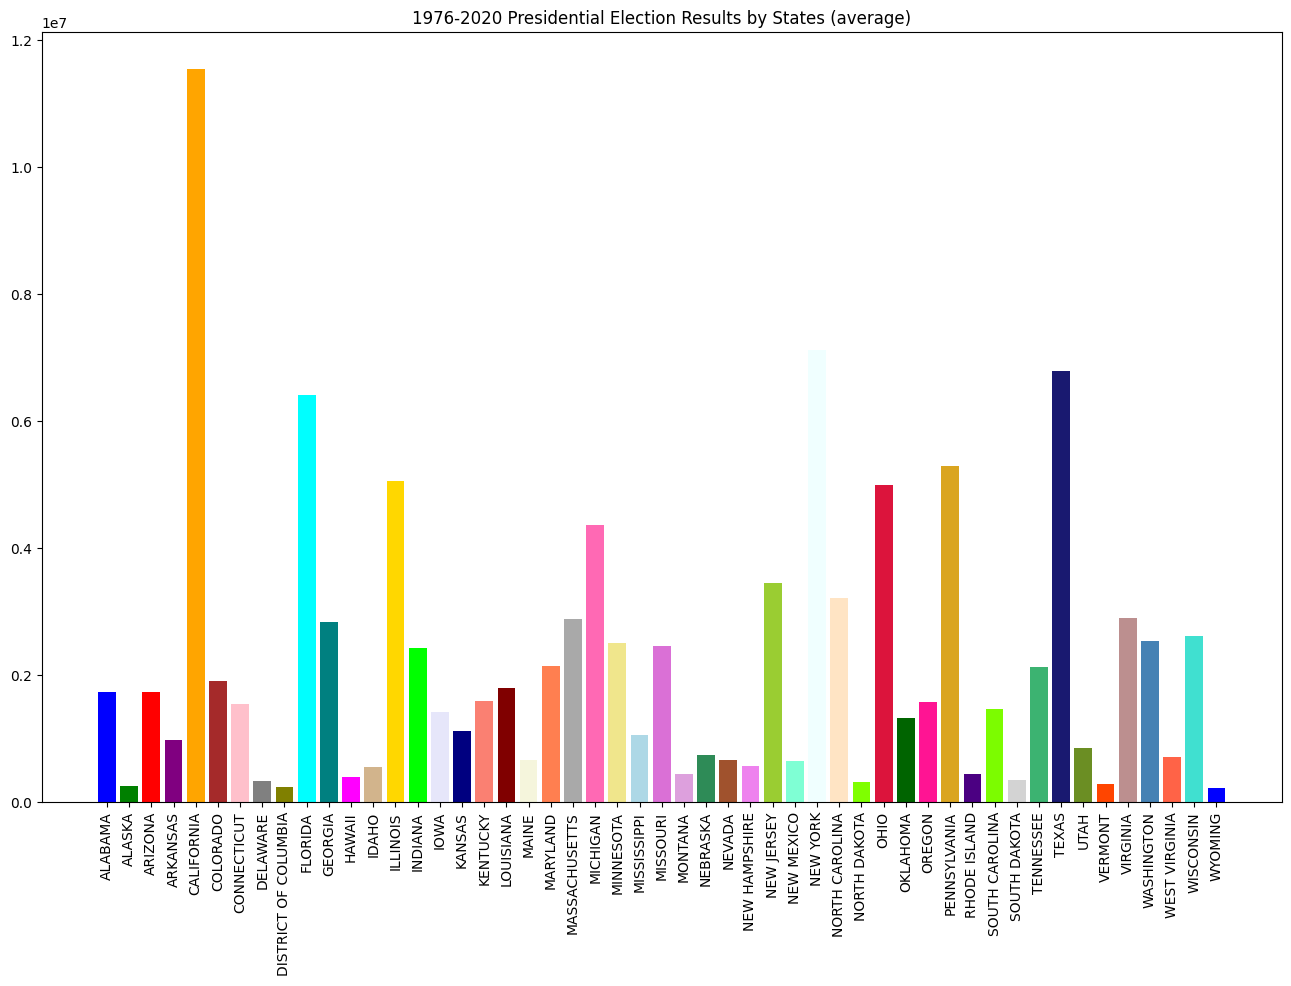

In [14]:
plt.figure(figsize=(16,10))

plt.bar(range(len(states)), vote_by_state_mean, color = colors, align='center', tick_label=states)
plt.title('1976-2020 Presidential Election Results by States (average)')
plt.xticks(rotation=90, fontsize=10);


### Well, between 1976-2020, the most active state was California as this state gave most of the votes to candidates, and since it appeared no as often as Colorado or New-York, we can conclude most serious candidates got their support exactly from California

# Votes of candidates at each year

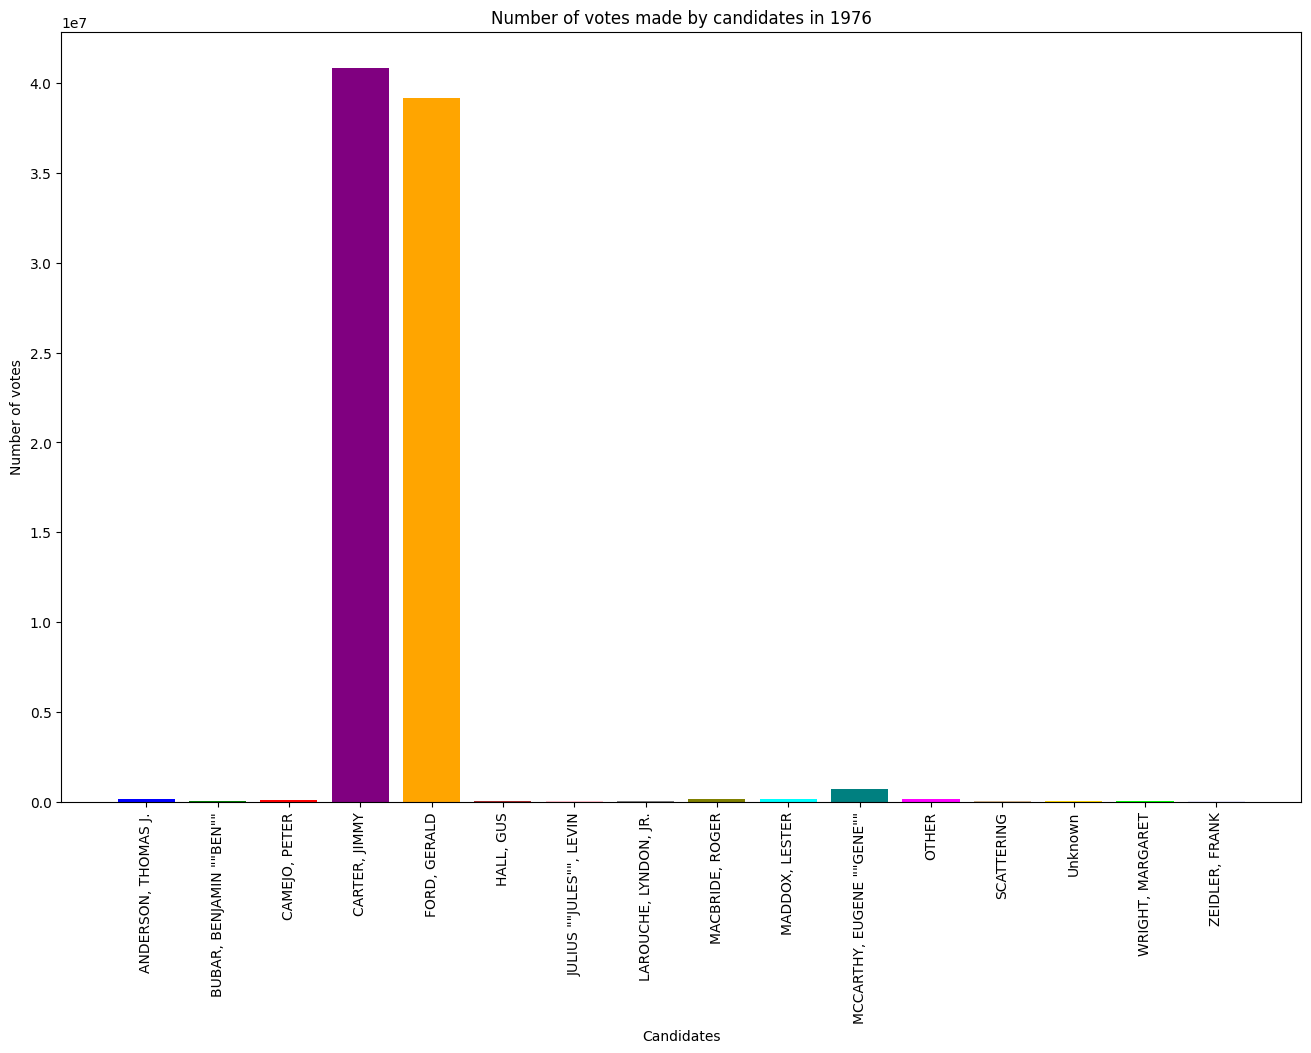

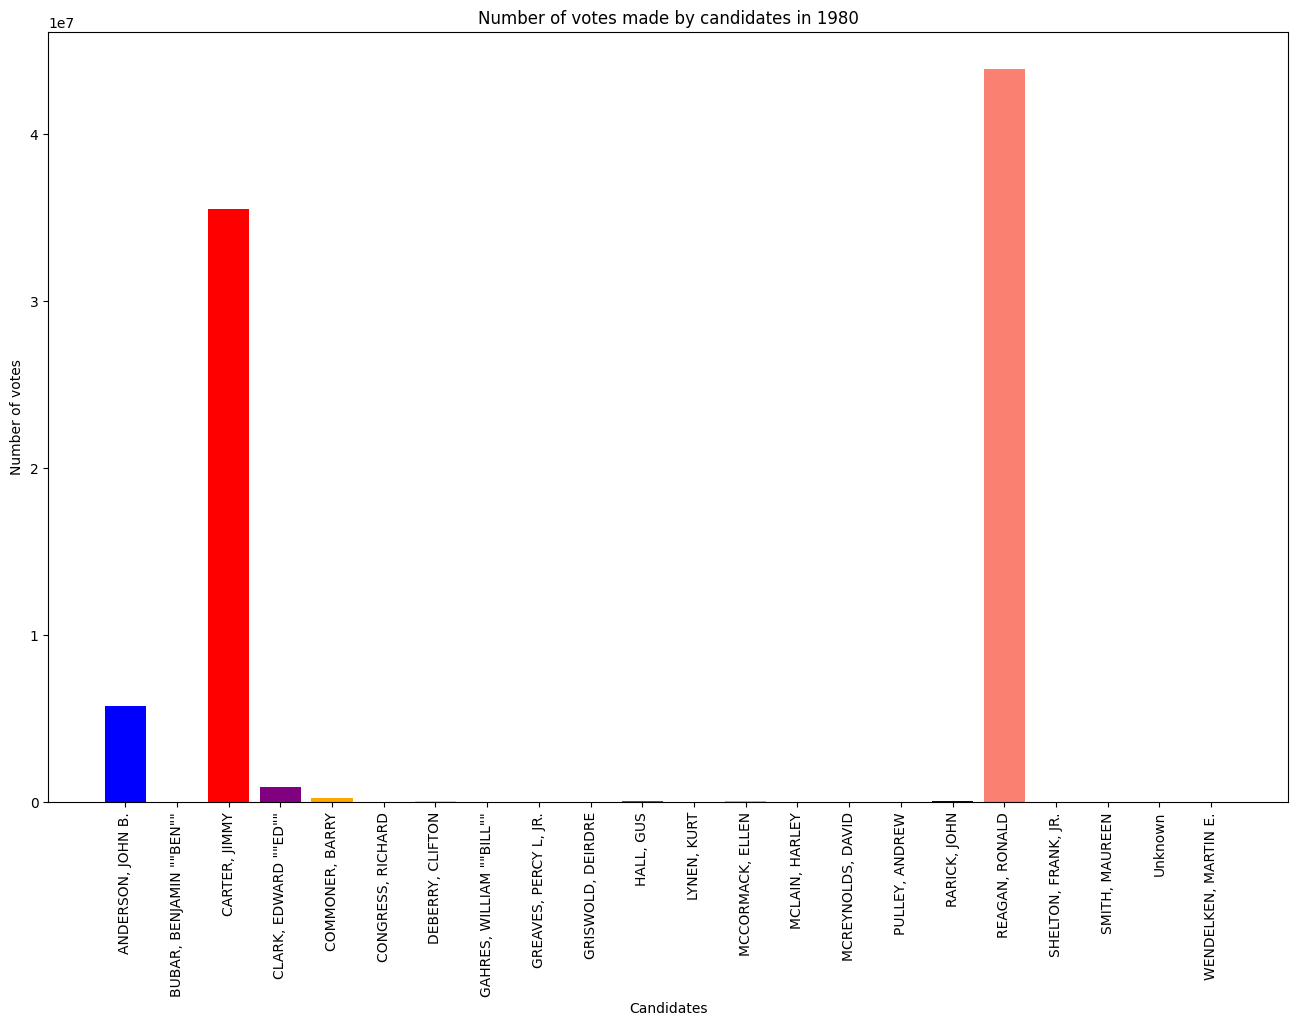

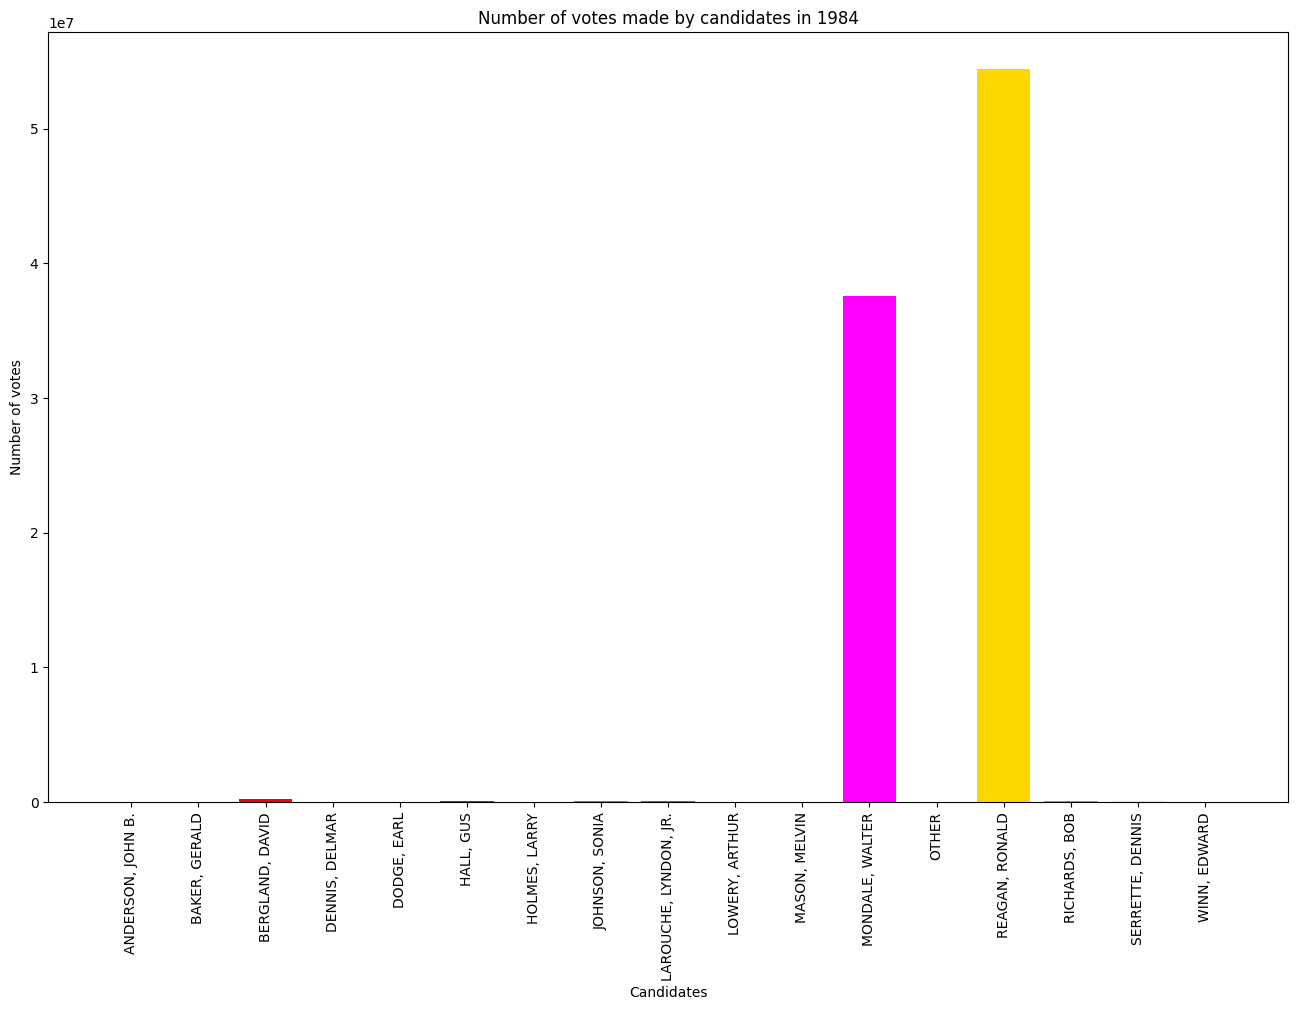

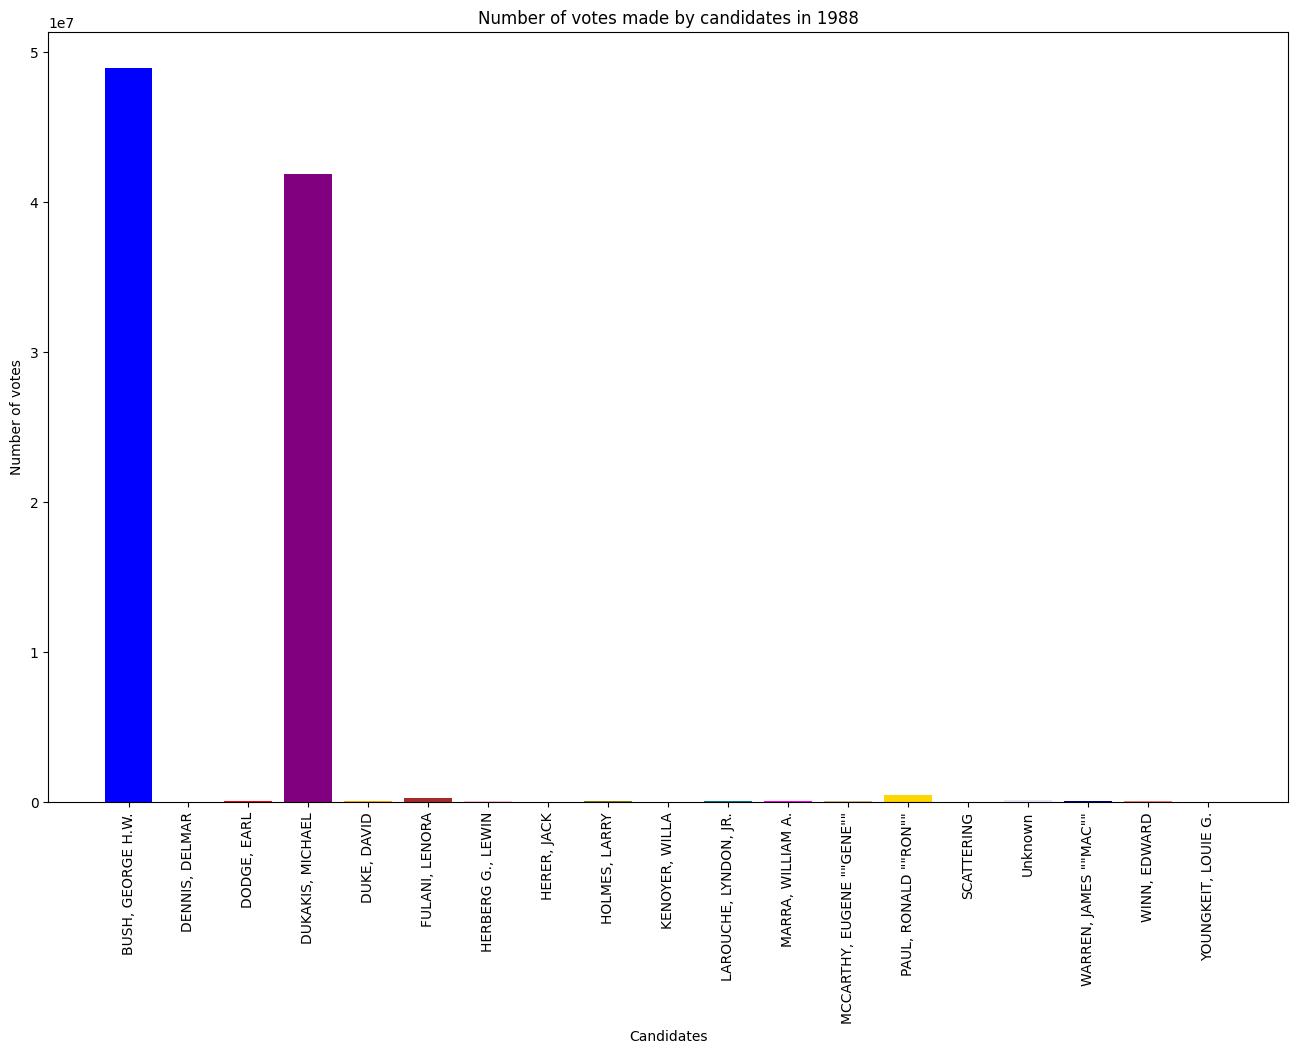

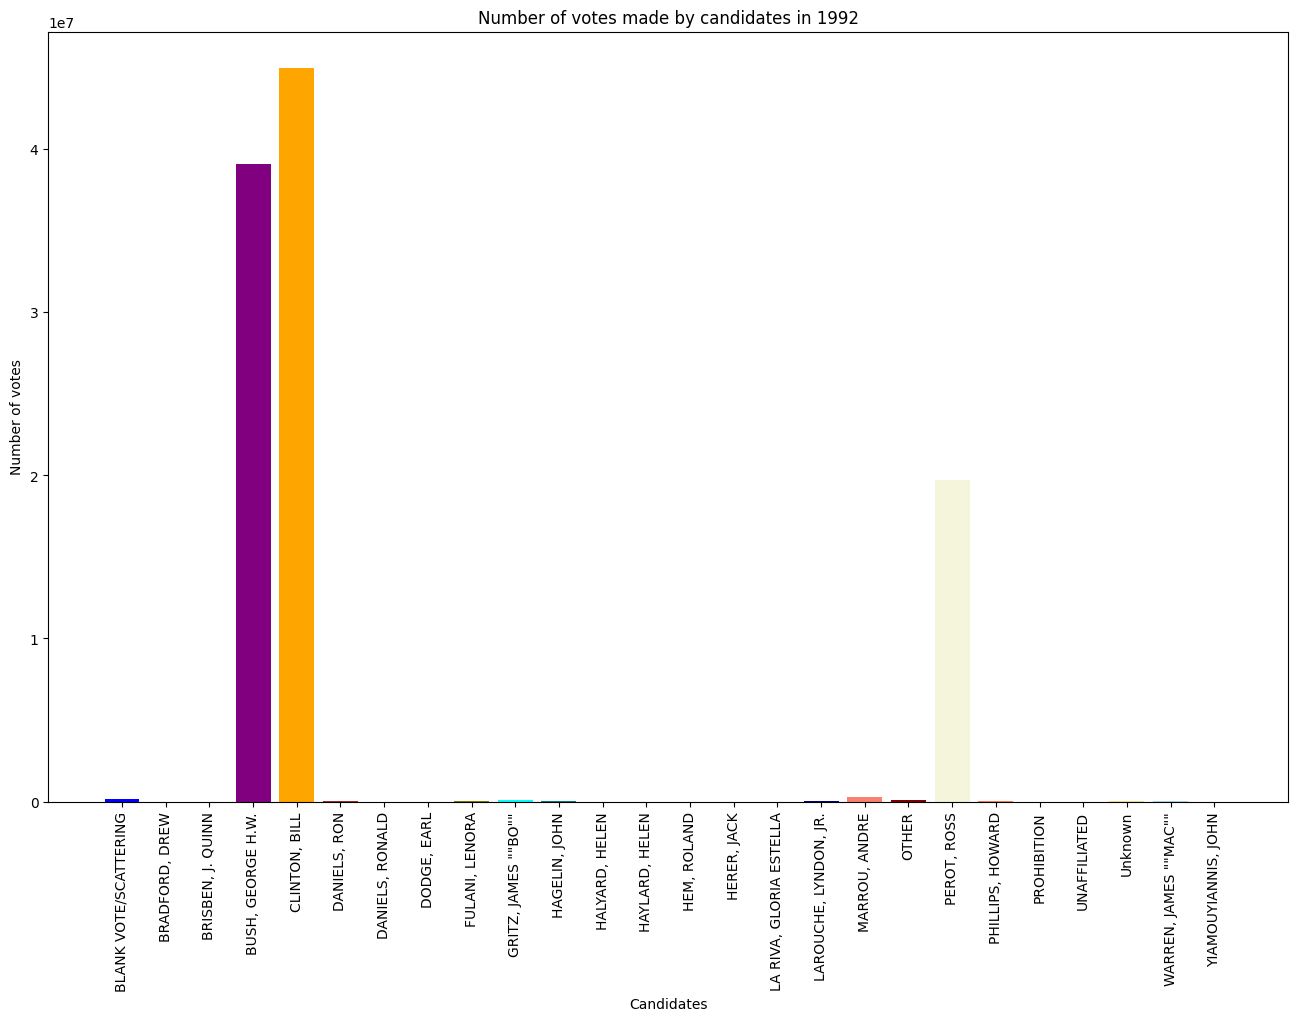

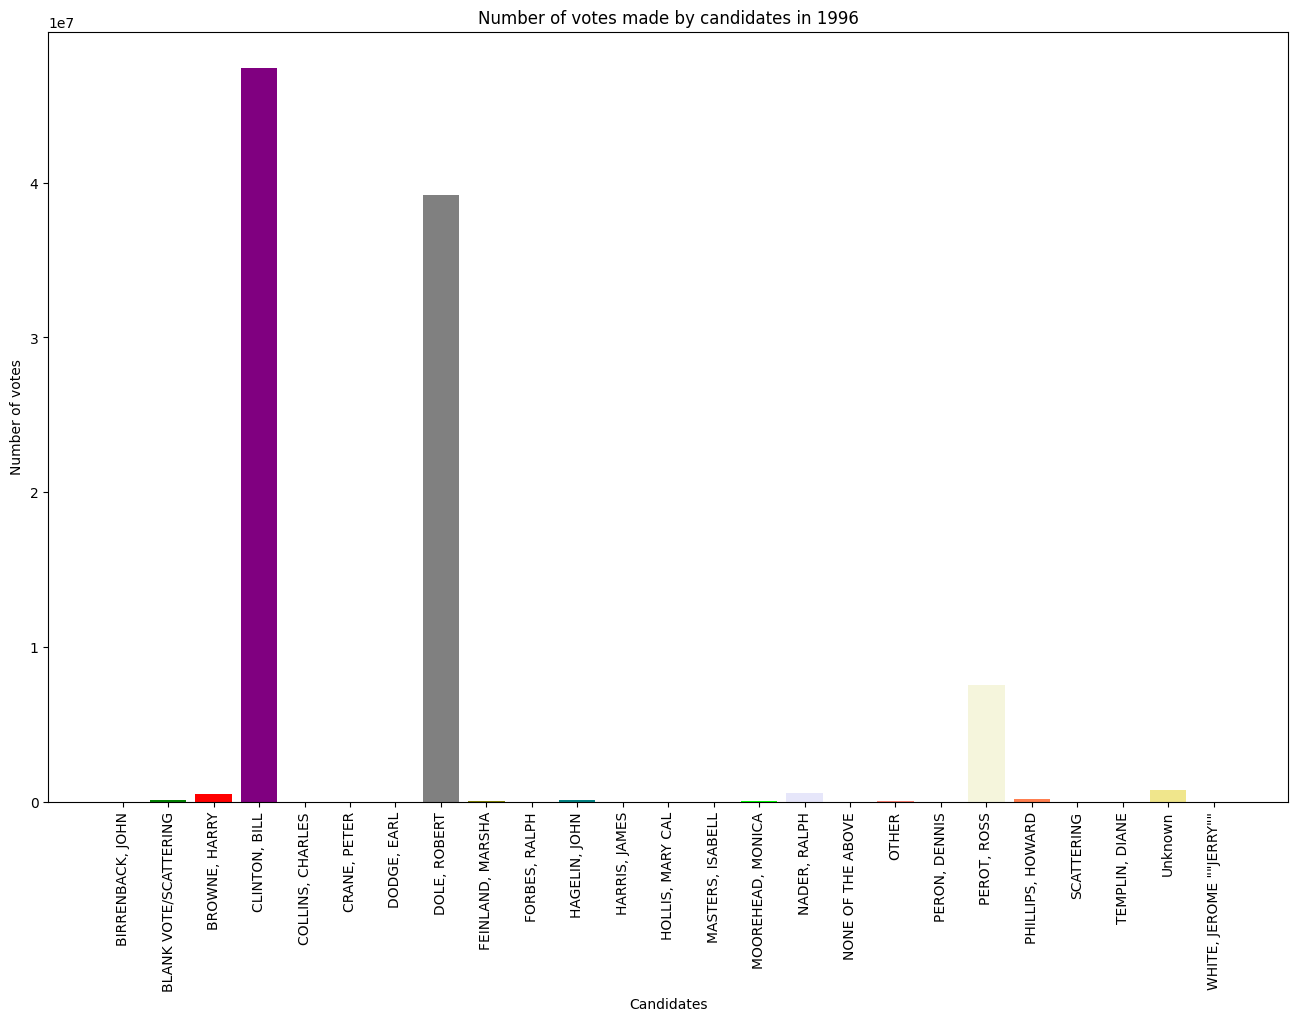

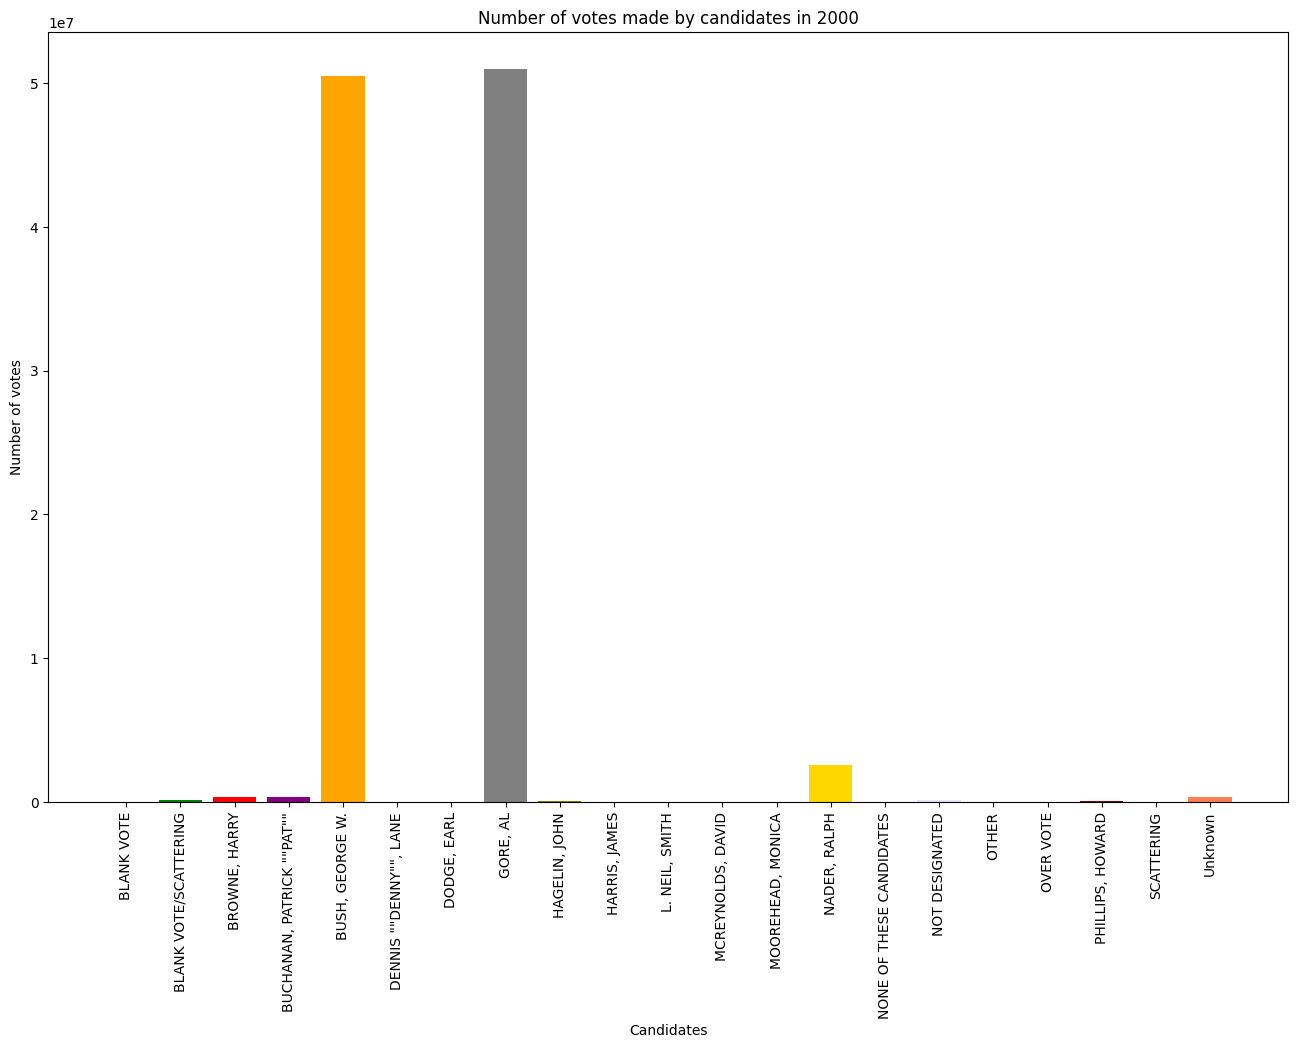

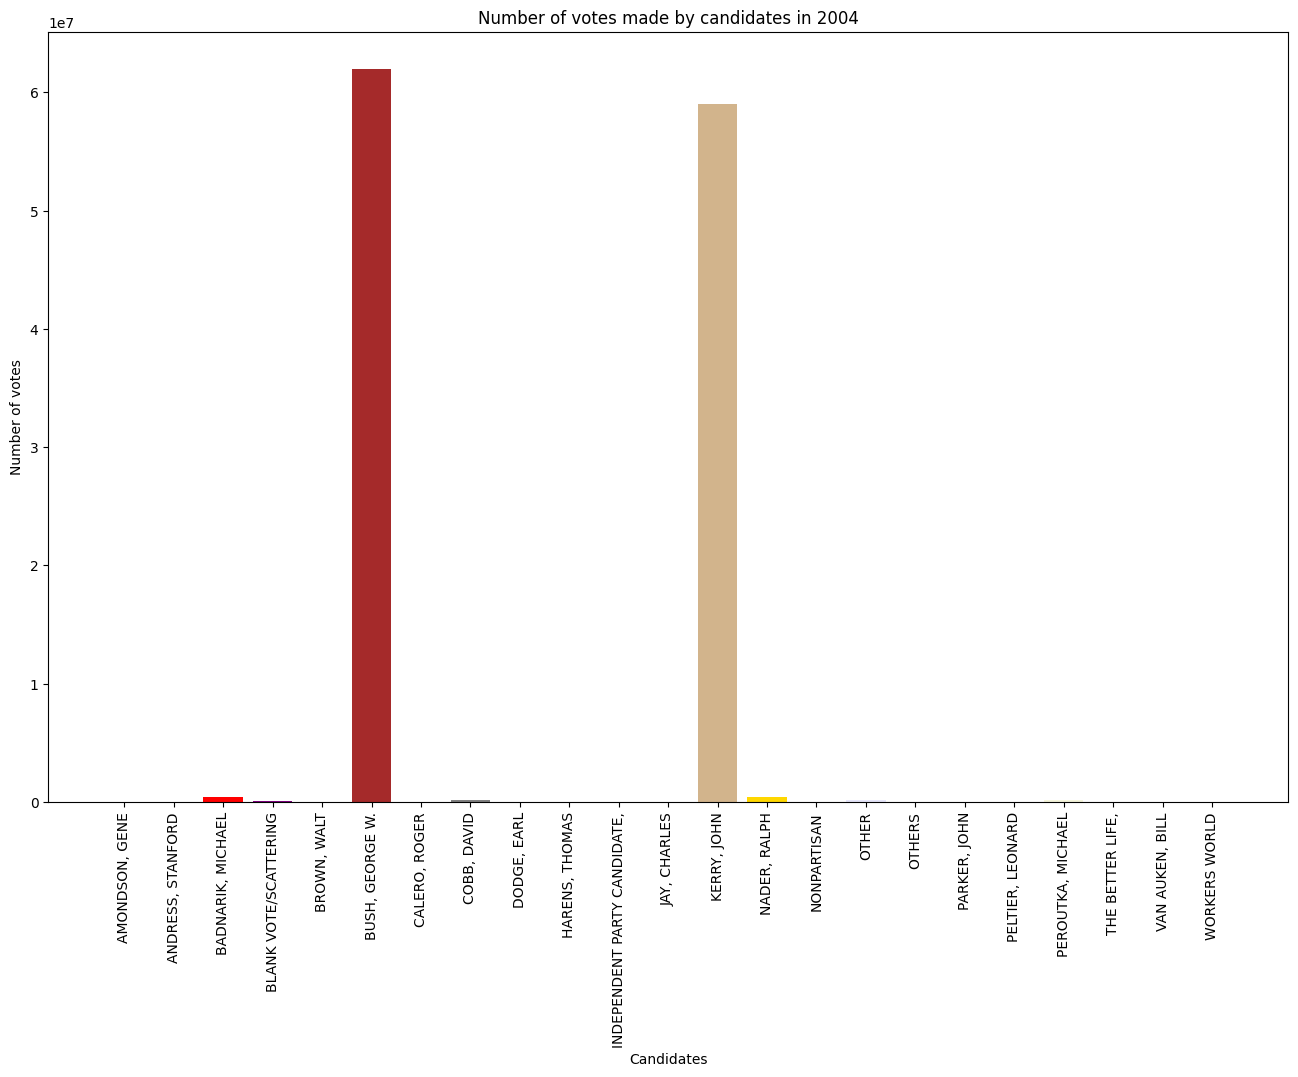

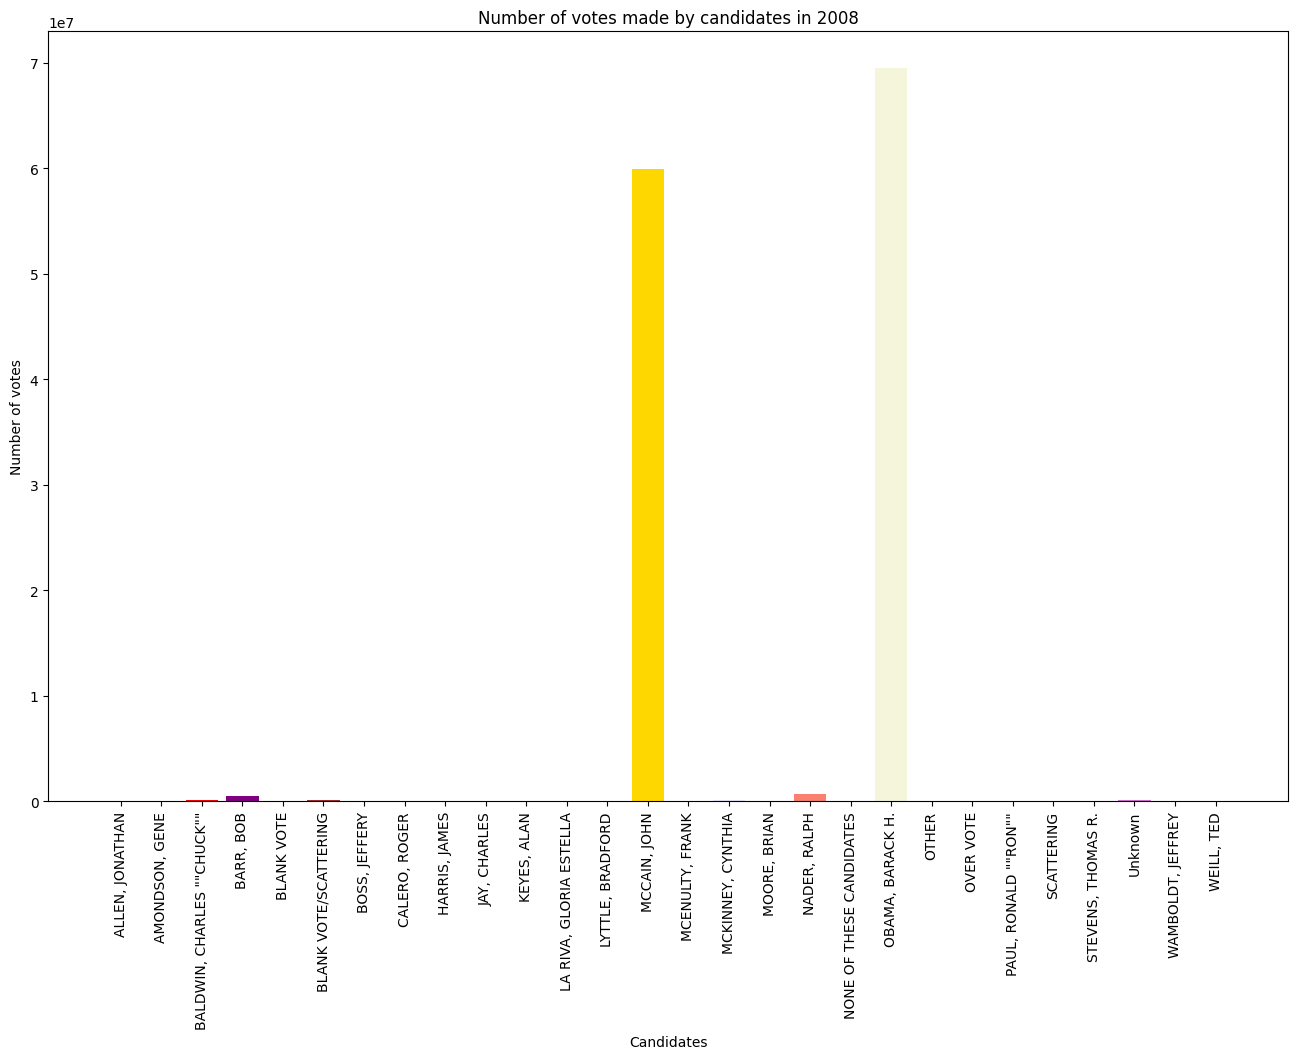

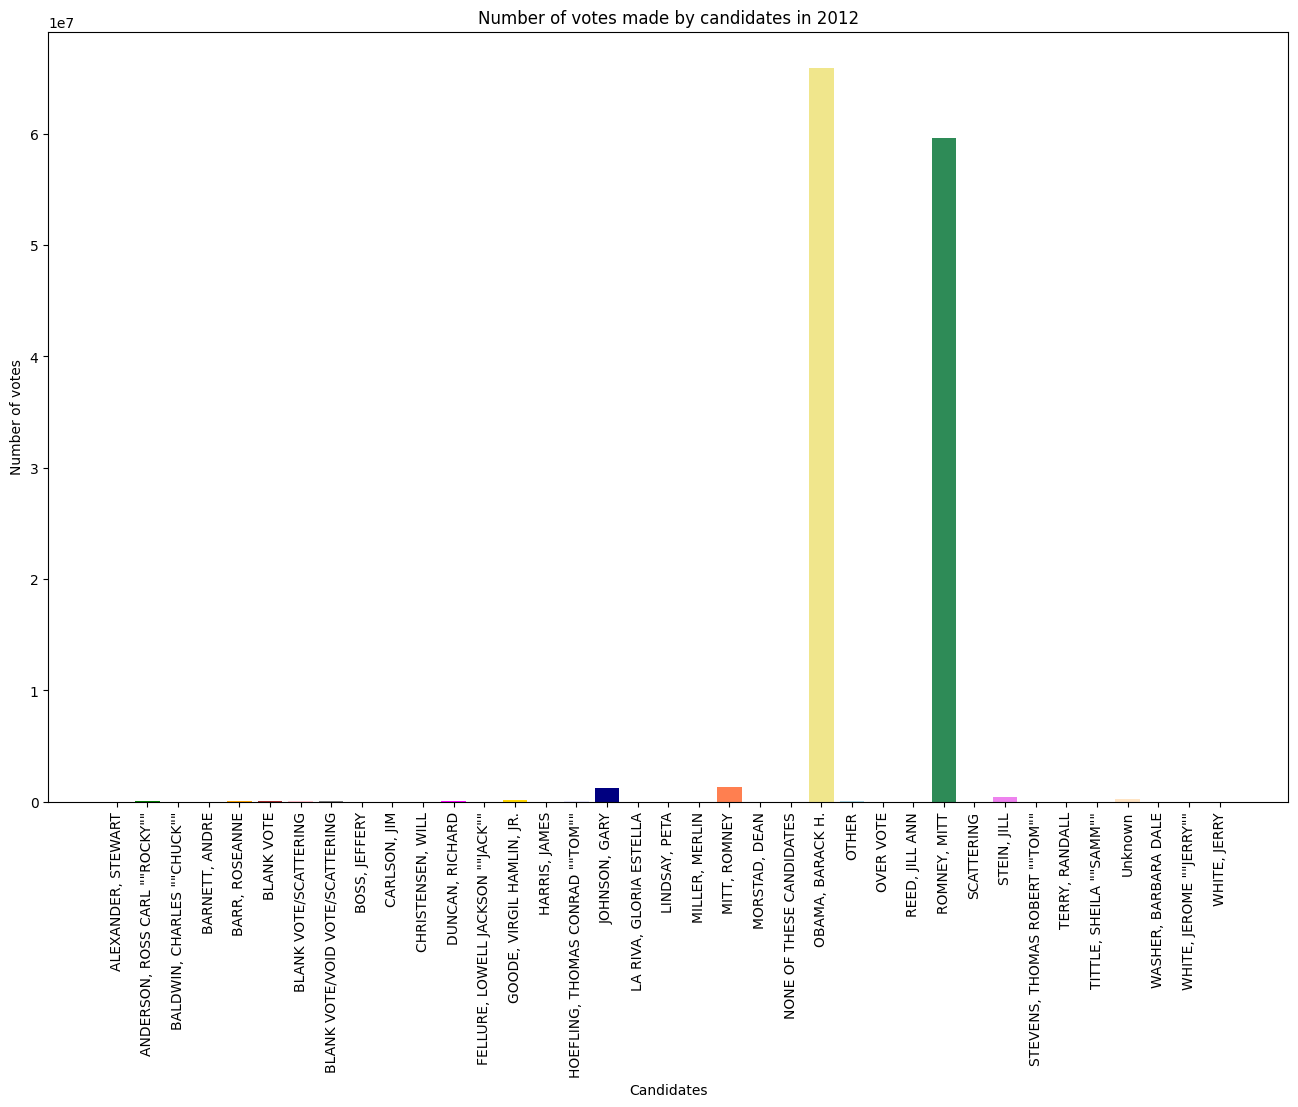

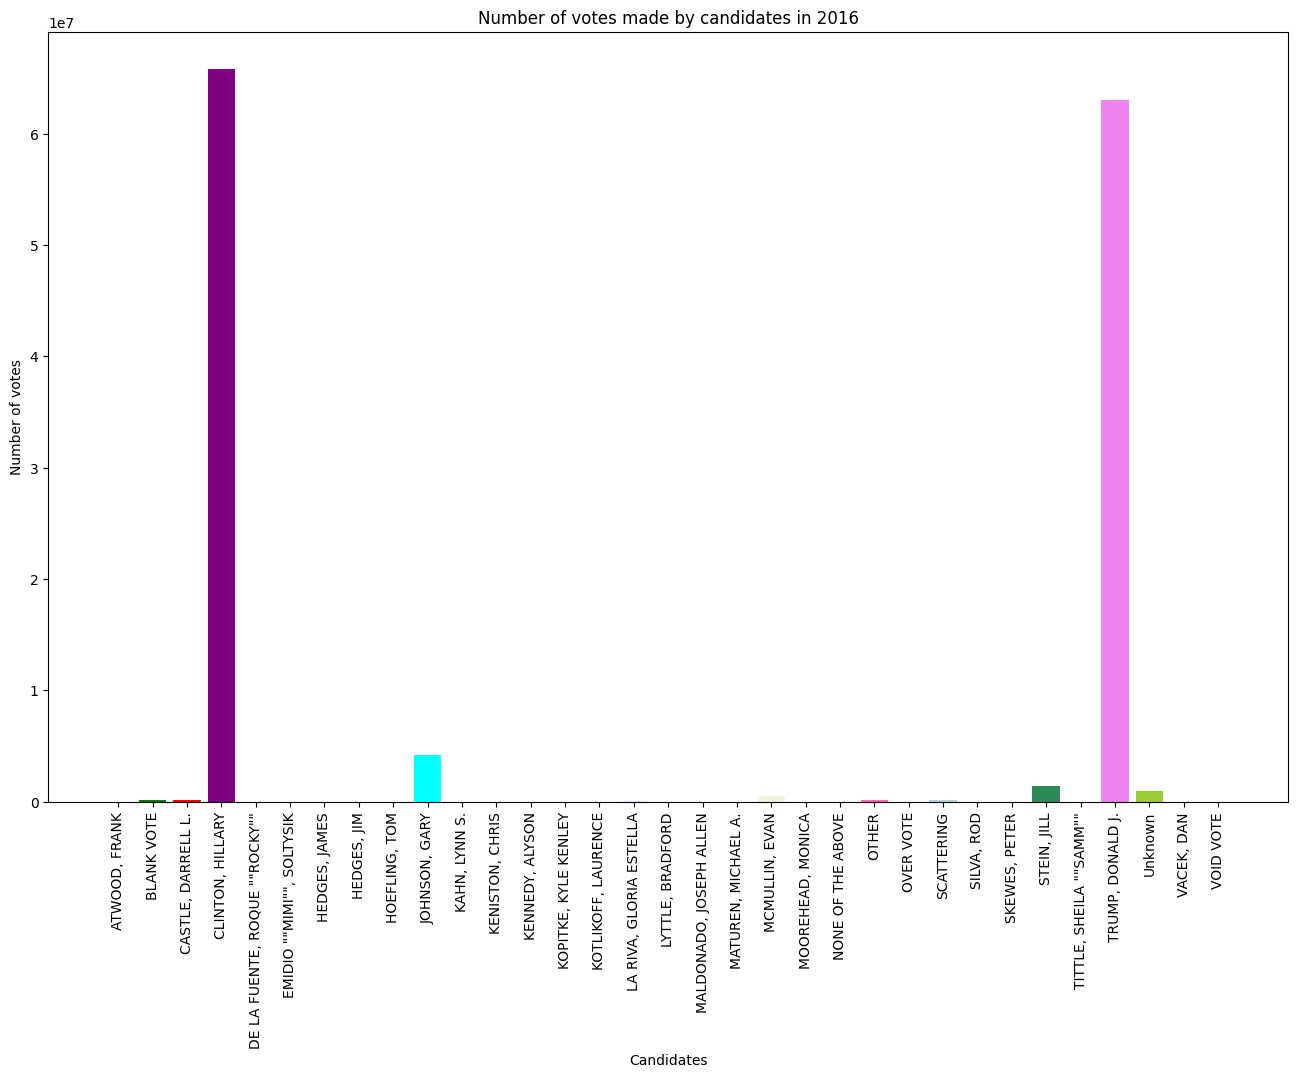

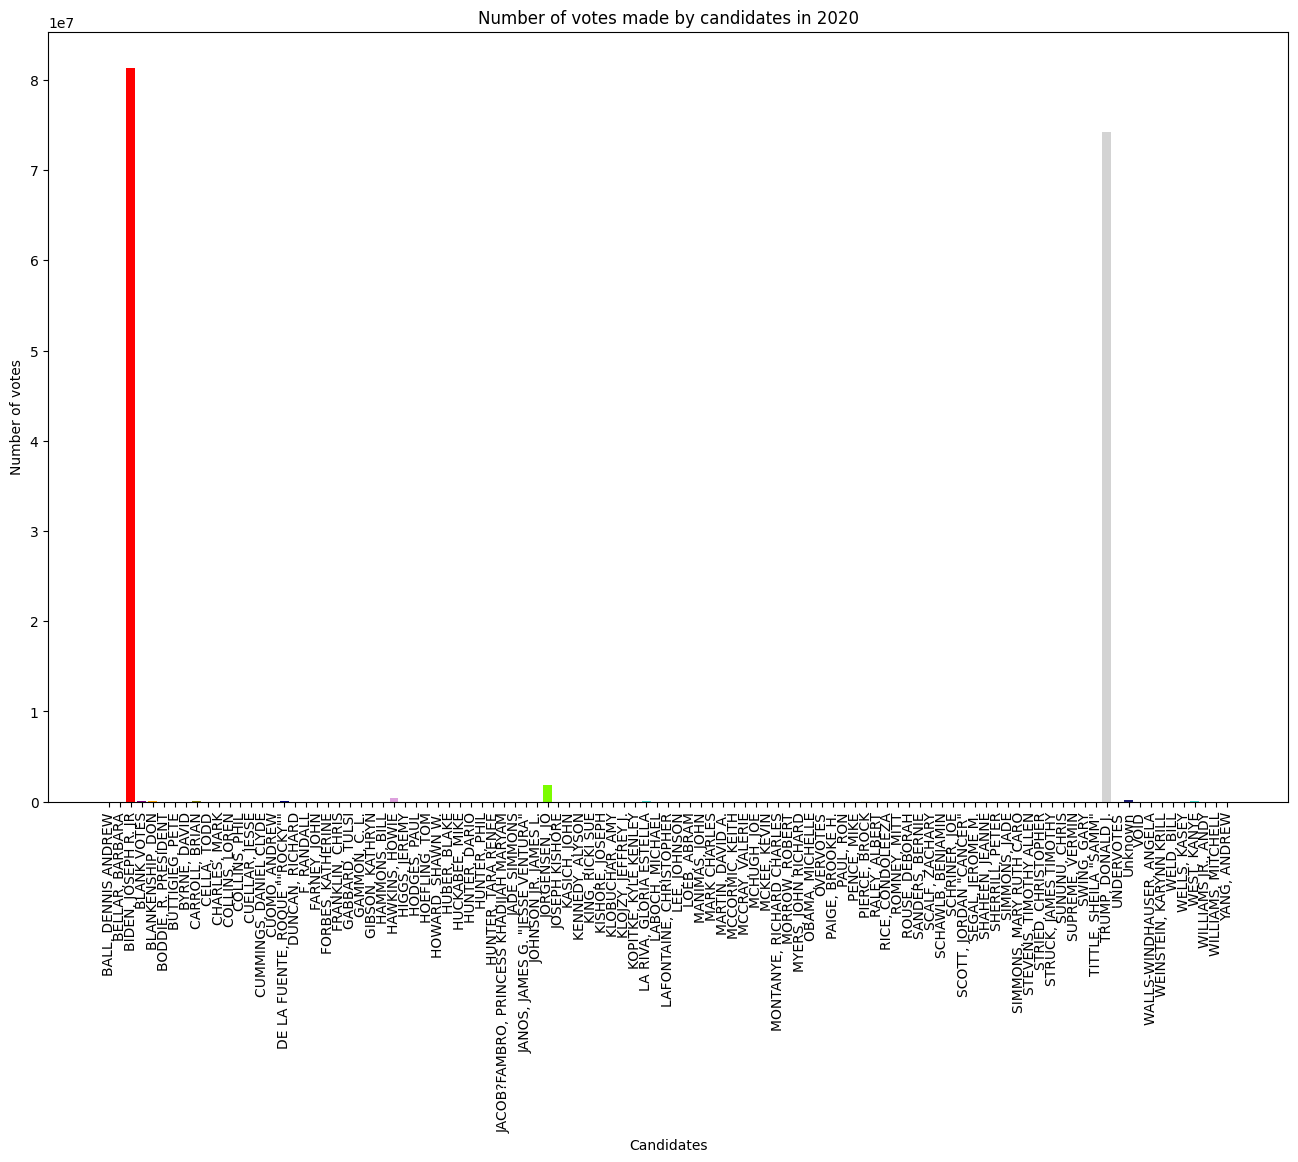

In [15]:
modified_df = president_df[['year','candidate','candidatevotes']]
#df.pivot(index='year', columns='candidate', values='candidatevotes')
modified_df = modified_df.groupby(['year','candidate']).sum()
new_df = modified_df.reset_index()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'teal', 'magenta', 'tan', 'gold', 'lime', 'lavender', 'navy', 'salmon', 'maroon', 'beige', 'coral', 'darkgray', 'hotpink', 'khaki', 'lightblue', 'orchid', 'plum', 'seagreen', 'sienna', 'violet', 'yellowgreen', 'aquamarine', 'azure', 'bisque', 'chartreuse', 'crimson', 'darkgreen', 'deeppink', 'goldenrod', 'indigo', 'lawngreen', 'lightgray', 'mediumseagreen', 'midnightblue', 'olivedrab', 'orangered', 'rosybrown', 'steelblue', 'tomato', 'turquoise']
for year in years:
    new_df_year = new_df[new_df.year==year]
        
    plt.figure(figsize=(16,10))
    plt.title('Number of votes made by candidates in {}'.format(year))
    plt.xlabel('Candidates')
    plt.ylabel('Number of votes')
    plt.bar(new_df_year.candidate, new_df_year.candidatevotes, color=colors[:(len(new_df_year.candidate))], align='center')
    plt.xticks(rotation=90, fontsize=10);

### Above shown graphs show results of votes for each candidate. From the data, it can be seen that the race most of the time was between only 2 candidates

# What party elected presidents were on?

In [16]:
party_df = president_df[['year','state','candidate','candidatevotes','party_simplified']]
party1_df = party_df.groupby(['year','candidate','party_simplified'])['candidatevotes'].sum()
party1_df = party1_df.reset_index()
presidents = []
max_votes = []
for year in years:
    max_vote = party1_df.loc[party1_df.year==year,'candidatevotes'].max()
    max_votes.append(max_vote)
    presidents.append(party1_df.loc[(party1_df.year==year)&(party1_df.candidatevotes==max_vote), 'candidate'].values[0])
party_of_can = []
for person, vote in zip(presidents,max_votes):
    party_of_can.append(party1_df.loc[(party1_df.candidate==person)&(party1_df.candidatevotes==vote),'party_simplified'].values[0])

,Votes,Party,President
1976,40680446,DEMOCRAT,"CARTER, JIMMY"
1980,43642639,REPUBLICAN,"REAGAN, RONALD"
1984,54166829,REPUBLICAN,"REAGAN, RONALD"
1988,48642640,REPUBLICAN,"BUSH, GEORGE H.W."
1992,44856747,DEMOCRAT,"CLINTON, BILL"
1996,47295351,DEMOCRAT,"CLINTON, BILL"
2000,50830580,DEMOCRAT,"GORE, AL"
2004,61872711,REPUBLICAN,"BUSH, GEORGE W."
2008,69338846,DEMOCRAT,"OBAMA, BARACK H."
2012,65752017,DEMOCRAT,"OBAMA, BARACK H."


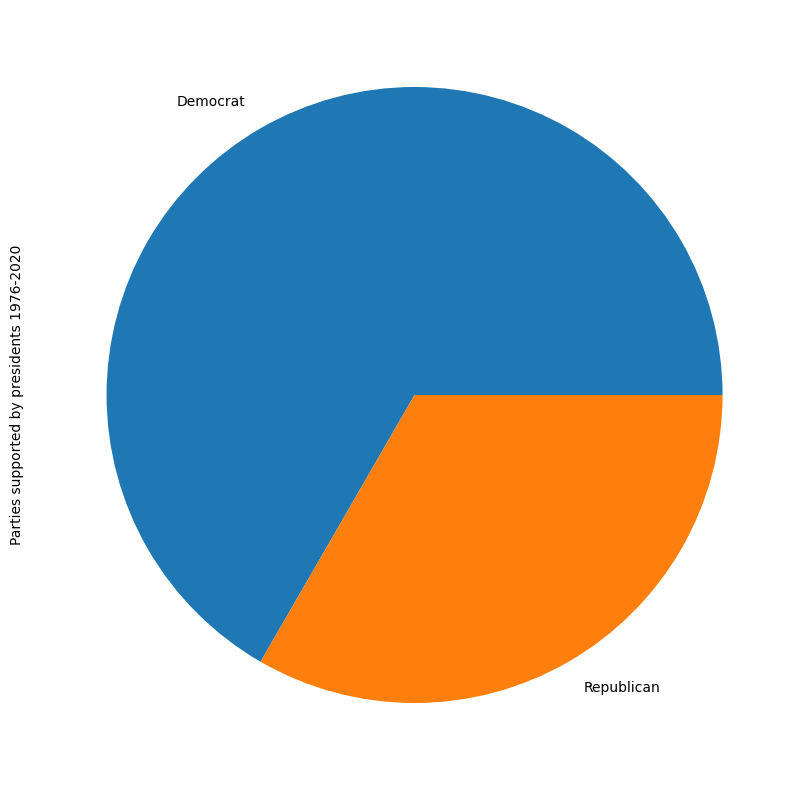

In [17]:
pd.Series([party_of_can.count('DEMOCRAT'),party_of_can.count('REPUBLICAN')], index=['Democrat','Republican'], name='Parties supported by presidents 1976-2020').plot.pie(figsize=(10,10));
president_vote_party = pd.DataFrame({'Votes':max_votes,
                                     'Party':party_of_can,
                                     'President': presidents},index=np.arange(1976,2024,4))
president_vote_party

### It seems like most of the elected candidates were Democrates between 1976-2020

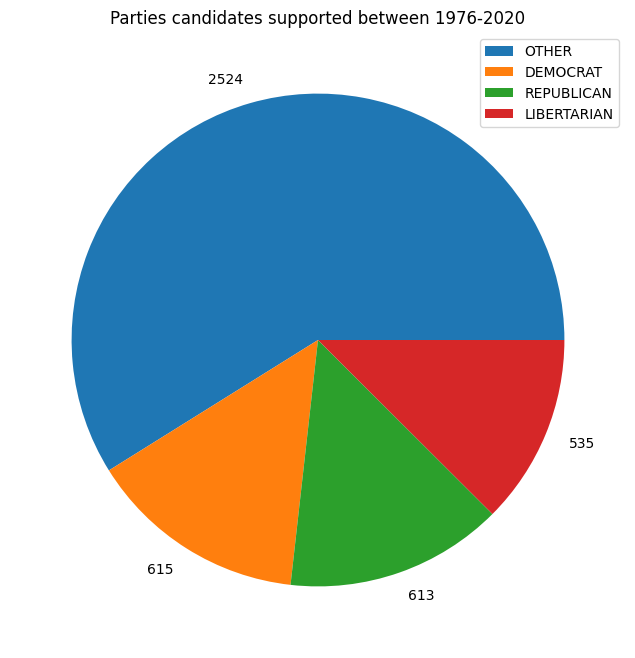

In [18]:
parties_candidates_values = president_df.party_simplified.value_counts().values
parties_candidates_labels = president_df.party_simplified.value_counts().index
plt.figure(figsize=(16,8))
plt.pie(parties_candidates_values, labels=parties_candidates_values)
plt.title('Parties candidates supported between 1976-2020')
plt.legend(parties_candidates_labels);

## If we exclude 'others' then between 1976-2020 the number of democrat and republican candidates were almost equal with ony 2 democrats more

# Writein?

In [19]:
writein_df = president_df[['year','candidate','writein','party_simplified']]
num_of_candidates = pd.DataFrame()
for year in years:
    mod_writein_df = writein_df[writein_df.year==year].drop_duplicates(subset='candidate')
    num_of_candidates[year] = [mod_writein_df.shape[0],mod_writein_df[mod_writein_df.writein==False].shape[0],mod_writein_df.shape[0]-mod_writein_df[mod_writein_df.writein==False].shape[0]]




In [20]:
num_of_candidates.index = ['#_of_candidates','not_writein','writein']

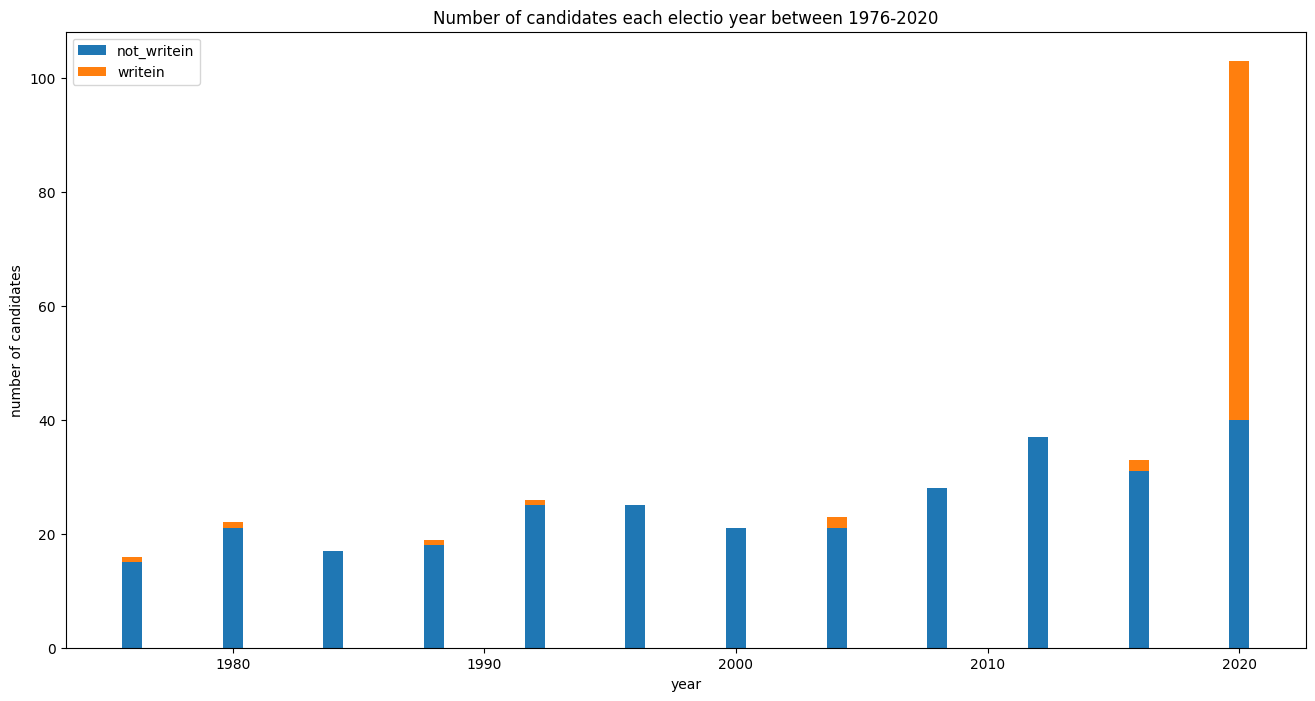

In [21]:
plt.figure(figsize=(16,8))
plt.title('Number of candidates each electio year between 1976-2020')
plt.xlabel('year')
plt.ylabel('number of candidates')
plt.bar(num_of_candidates.columns,height=num_of_candidates.iloc[1], align='center')
plt.bar(num_of_candidates.columns, num_of_candidates.iloc[2], bottom=num_of_candidates.iloc[1], align='center')
plt.legend(num_of_candidates.index[1:]);

### Only in 2020 the number of write-in candidates were much higher than previous election years between 1976-2020

# Votes gathered by elected candidates by states

In [22]:
stars_df = president_df[['year','state','candidate','candidatevotes']]

In [23]:
frames = []
for president, year in zip(presidents,years):
    frames.append(stars_df.loc[(stars_df.year==year) & (stars_df.candidate==president)])
result_df = pd.concat(frames)
result_df



,year,state,candidate,candidatevotes
0,1976,ALABAMA,"CARTER, JIMMY",659170
8,1976,ALASKA,"CARTER, JIMMY",44058
12,1976,ARIZONA,"CARTER, JIMMY",295602
19,1976,ARKANSAS,"CARTER, JIMMY",498604
24,1976,CALIFORNIA,"CARTER, JIMMY",3742284
...,...,...,...,...
4252,2020,VIRGINIA,"BIDEN, JOSEPH R. JR",2413568
4256,2020,WASHINGTON,"BIDEN, JOSEPH R. JR",2369612
4263,2020,WEST VIRGINIA,"BIDEN, JOSEPH R. JR",235984
4267,2020,WISCONSIN,"BIDEN, JOSEPH R. JR",1630866


In [24]:
president_votes_by_states = result_df.pivot_table(index=['year','candidate'], columns='state',values='candidatevotes')

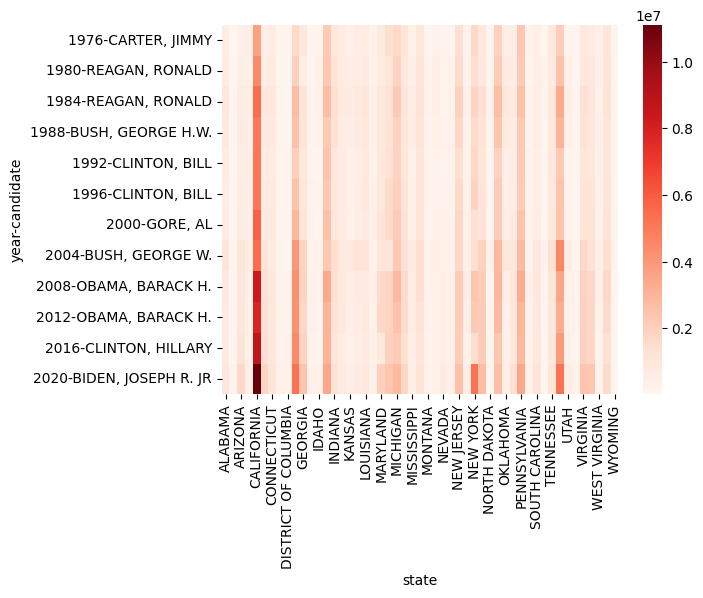

In [25]:
sns.heatmap(president_votes_by_states,cmap='Reds');

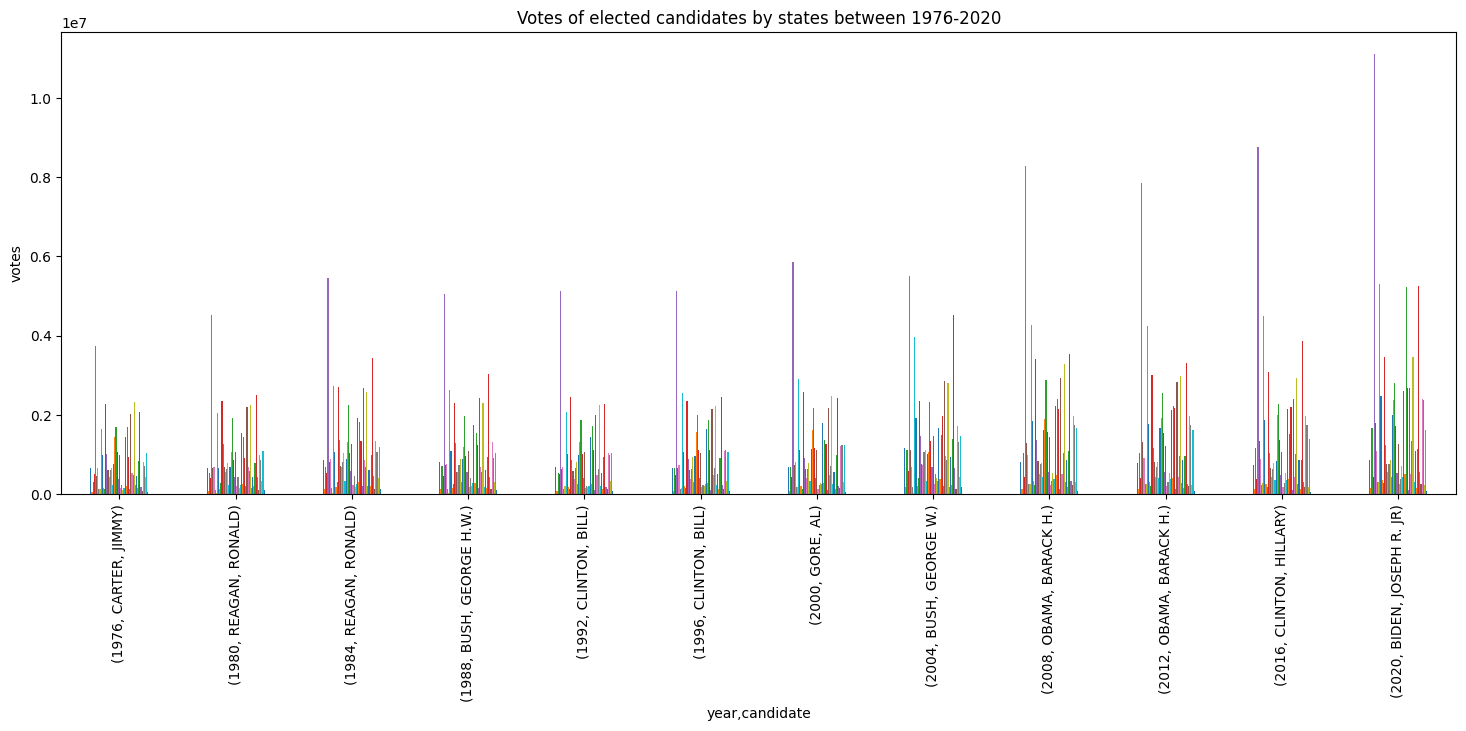

In [26]:
president_votes_by_states.plot.bar(figsize=(18,6), title='Votes of elected candidates by states between 1976-2020', ylabel='votes', legend=False);

# Between 1976-2020 all candidates got majority of their voices from citizens of California